<a href="https://colab.research.google.com/github/Joel4ngel/AMP-Tech/blob/master/emisiones_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Autor: Joel Taquia
#Llamo las librias que usare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#=====================================================
#1. Cargo la data que previamente lo subi a mi DRIVE
ruta='/content/emision_co2.csv'
df = pd.read_csv(ruta,sep=';',)

#Elimino la ultima columna,pues la ultima columna del csv se guardo con ';'
df=df.drop(df.columns[-1], axis='columns')
#Muestro la data
df

,pais,codigo,construccion,industrias,otros combustibles,transporte,manufacturacion,fugas,energia,nivel,Unnamed: 10
55,Portugal,PRT,2.9,2.55,1.1,15.8,5.6,0.00,20.3,medio,NaN
56,Peru,PER,2.7,3.95,0.5,17.4,7.7,0.33,15.2,medio,NaN
57,Singapore,SGP,0.6,0.00,0.0,7.4,10.5,0.00,27.5,medio,NaN
58,Serbia,SRB,2.8,0.88,0.4,5.1,4.9,0.00,31.4,medio,NaN
59,Bulgaria,BGR,1.4,0.98,0.5,8.2,3.3,0.00,31.0,medio,NaN


In [24]:
#2.	Seleccionar las variables dependientes e independientes que usare en el PCA

#Variables dependientes
X = df.iloc[:,2:9].values
# la submatriz x contiene los valores de los 7 sectores.

#Variables independientes
y = df.iloc[:,-1].values
# El vector y contiene los categoricos de la ultima variable

X1 = df.iloc[:,2:9]
y1 = df.iloc[:,-1]

In [28]:
X1.head()

,construccion,industrias,otros combustibles,transporte,manufacturacion,fugas
0,457.2,714.80,186.0,686.1,3029.8,0.00
1,460.6,35.27,46.1,1597.5,438.6,11.93
2,486.9,53.74,63.1,753.0,377.9,1.86
3,96.6,101.40,57.1,219.2,433.0,1.91
4,122.4,26.25,14.1,237.3,169.4,32.66


In [29]:
y1.head()

0    muy alto
1    muy alto
2    muy alto
3    muy alto
4    muy alto
Name: nivel, dtype: object

In [44]:
#3. Normalizo las variables
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [45]:
X1_std=StandardScaler().fit_transform(X1)

In [56]:
# Calculamos la matriz de varianzas covarianza
cov_mat=np.cov(X_std.T)
cov_mat

array([[ 1.01694915,  0.59987643,  0.79672935,  0.90733391,  0.68080573,
         0.13005835,  0.87178034],
       [ 0.59987643,  1.01694915,  0.95257773,  0.40072509,  1.00884687,
        -0.0336988 ,  0.89089663],
       [ 0.79672935,  0.95257773,  1.01694915,  0.61645473,  0.97554578,
        -0.00652657,  0.95899333],
       [ 0.90733391,  0.40072509,  0.61645473,  1.01694915,  0.49868548,
         0.17084984,  0.77586658],
       [ 0.68080573,  1.00884687,  0.97554578,  0.49868548,  1.01694915,
        -0.01565356,  0.93900453],
       [ 0.13005835, -0.0336988 , -0.00652657,  0.17084984, -0.01565356,
         1.01694915,  0.09353372],
       [ 0.87178034,  0.89089663,  0.95899333,  0.77586658,  0.93900453,
         0.09353372,  1.01694915]])

In [57]:
#4.Obtengo los autovectores y autovalores a partir de la matriz de covarianza

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [63]:
#Autovalores ya están ordenado de mayor a menos felizmente
for i in eig_vals: print(i)

5.014360727568823
1.180004408246949
0.7842992021082758
0.09216283476136164
0.03125024916074608
0.014836493416105913
0.001730152534361756


In [66]:
#Autovectores
for i in eig_vecs: print(i)

[ 0.39422048  0.27216274 -0.35425408 -0.72302203 -0.33627656  0.09046407
  0.03154643]
[ 0.40263318 -0.30120325  0.3421159   0.10025392 -0.17459184  0.41925339
  0.6432832 ]
[ 0.43649823 -0.14481552  0.10374791 -0.27132086  0.82424874 -0.15447221
 -0.02952091]
[ 0.33770523  0.41976495 -0.51390049  0.54259616  0.20097966  0.33274741
  0.0116019 ]
[ 0.42201621 -0.23738226  0.25845422  0.12262467 -0.23917654  0.24110822
 -0.75390848]
[ 0.03193256  0.76225979  0.64482831 -0.02397996  0.0318012   0.0220494
 -0.00801509]
[ 0.44585181  0.02528969  0.00113314  0.28905164 -0.28007183 -0.78920276
  0.12547204]


In [67]:

# Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]


Autovalores en orden descendiente:
5.014360727568823
1.180004408246949
0.7842992021082758
0.09216283476136164
0.03125024916074608
0.014836493416105913
0.001730152534361756


In [70]:
#Lista de (autovalor y autovecro correspondiente)
for i in eig_pairs: print(i)

(5.014360727568823, array([0.39422048, 0.40263318, 0.43649823, 0.33770523, 0.42201621,
       0.03193256, 0.44585181]))
(1.180004408246949, array([ 0.27216274, -0.30120325, -0.14481552,  0.41976495, -0.23738226,
        0.76225979,  0.02528969]))
(0.7842992021082758, array([-0.35425408,  0.3421159 ,  0.10374791, -0.51390049,  0.25845422,
        0.64482831,  0.00113314]))
(0.09216283476136164, array([-0.72302203,  0.10025392, -0.27132086,  0.54259616,  0.12262467,
       -0.02397996,  0.28905164]))
(0.03125024916074608, array([-0.33627656, -0.17459184,  0.82424874,  0.20097966, -0.23917654,
        0.0318012 , -0.28007183]))
(0.014836493416105913, array([ 0.09046407,  0.41925339, -0.15447221,  0.33274741,  0.24110822,
        0.0220494 , -0.78920276]))
(0.001730152534361756, array([ 0.03154643,  0.6432832 , -0.02952091,  0.0116019 , -0.75390848,
       -0.00801509,  0.12547204]))


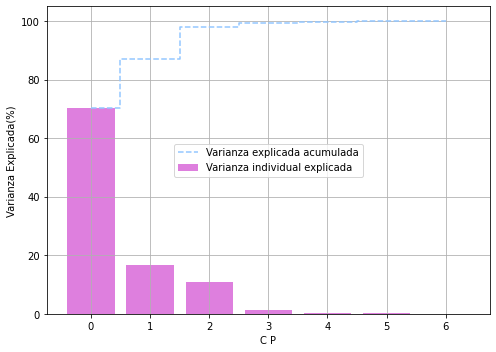

In [92]:

# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
#varianza porcentual para cada autovalor
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

#Hago una suma acumulada
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(7,5))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',label='Varianza individual explicada', color='m')
    plt.step(range(7), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Varianza Explicada(%)')
    plt.xlabel('C P')
    plt.legend(loc='center')
    plt.tight_layout()
    plt.grid()

In [ ]:
#6.Proyecto el dataset original sobre el nuevo espacio reducido.
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

In [94]:
eig_pairs[0][1]

array([0.39422048, 0.40263318, 0.43649823, 0.33770523, 0.42201621,
       0.03193256, 0.44585181])

In [95]:
eig_pairs[1][1]

array([ 0.27216274, -0.30120325, -0.14481552,  0.41976495, -0.23738226,
        0.76225979,  0.02528969])

In [102]:

#Generamos la matríz a partir de los pares autovalor-autovector.
#Seleccioné los 2 autovalores más altos
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1),
                      eig_pairs[1][1].reshape(7,1)))

CP = X_std.dot(matrix_w)

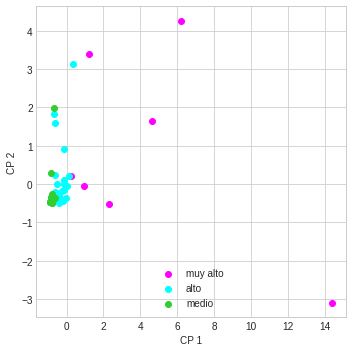

In [110]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(5, 5))
    for lab, col in zip(('muy alto', 'alto', 'medio'),('magenta', 'cyan', 'limegreen')):
        plt.scatter(CP[y==lab, 0], CP[y==lab, 1],label=lab,c=col)
        
    plt.xlabel('CP 1')
    plt.ylabel('CP 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()